In [ ]:
import kagglehub
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Download latest version
path = kagglehub.dataset_download("thedevastator/higher-education-predictors-of-student-retention")

print("Path to dataset files:", path)
csv_file=None
for file in os.listdir(path):
    if file.endswith(".csv"):
        csv_file = os.path.join(path, file)
        break
if csv_file is None:
    print("No CSV file found in the downloaded dataset.")
else:
  print(f"Found CSV file: {csv_file}")
df = pd.read_csv(csv_file)
print(df.head())

Path to dataset files: /root/.cache/kagglehub/datasets/thedevastator/higher-education-predictors-of-student-retention/versions/2
Found CSV file: /root/.cache/kagglehub/datasets/thedevastator/higher-education-predictors-of-student-retention/versions/2/dataset.csv
   Marital status  Application mode  Application order  Course  \
0               1                 8                  5       2   
1               1                 6                  1      11   
2               1                 1                  5       5   
3               1                 8                  2      15   
4               2                12                  1       3   

   Daytime/evening attendance  Previous qualification  Nacionality  \
0                           1                       1            1   
1                           1                       1            1   
2                           1                       1            1   
3                           1                       1       

In [ ]:
# Check for missing values
print("\nMissing values in each column:\n", df.isnull().sum())


Missing values in each column:
 Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                  

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Encode the 'Target' column
label_encoder = LabelEncoder()
df['Target'] = label_encoder.fit_transform(df['Target'])

# Display the mapping of Target to numbers
Target_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("\nTarget to Number Mapping:", Target_mapping)


Target to Number Mapping: {'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}


In [ ]:
# Step 2: Create a Pair Plot for checking outliers
plt.figure(figsize=(10, 8))
sns.pairplot(df)
plt.suptitle('Pair Plot to Identify Outliers', y=1.02)
plt.show()

<Figure size 1000x800 with 0 Axes>

In [ ]:
# Get the actual column names
print(df.columns)

# Update column names in the code to match the actual column names
columns = df[['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance', 'Previous qualification', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)',  'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)']] # Removed problematic columns for now

# Step 3: Standardize the Data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(columns)

# Convert to DataFrame for easier handling
features_scaled_df = pd.DataFrame(features_scaled, columns=columns.columns)  # Use columns.columns to get the correct column names

# Display the standardized data
print(features_scaled_df)

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

In [ ]:
from sklearn.decomposition import PCA

Explained variance by component: [0.19713056 0.12780763 0.08078492 0.07302616 0.05831663 0.04897333
 0.04495254 0.03964937 0.03704717 0.03471836 0.03362705 0.03077918
 0.02988854 0.02668274 0.02296259 0.02063902 0.01905922 0.01816233
 0.01303047]
Total variance explained by PCA: 0.9572378181197854


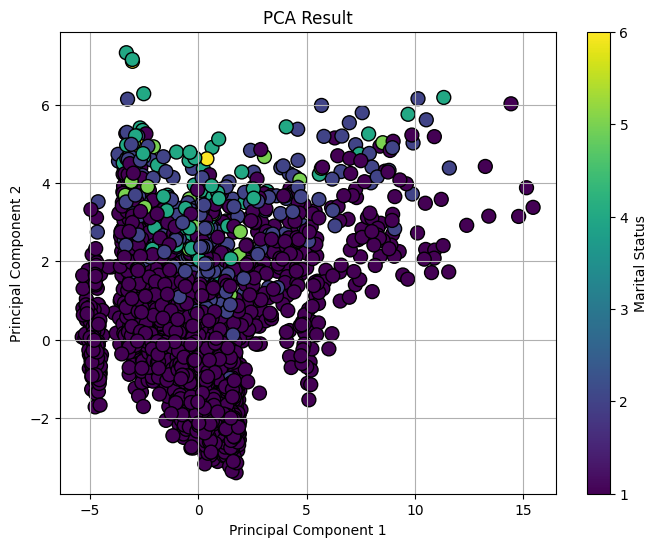

In [ ]:
import numpy as np
# Step 2: Apply PCA with 95% variance retention
pca = PCA(n_components=0.95)
principal_components = pca.fit_transform(features_scaled)

# Step 3: Create a DataFrame with the PCA results
# Use the number of components that PCA returns
pca_df = pd.DataFrame(data=principal_components)

# Step 4: Optionally, include original labels (if you have any)
# For example, if you have a 'Marital status' column
# CHANGED: Use 'df' instead of 'data'
if 'Marital status' in df.columns:
    pca_df['Marital status'] = df['Marital status'].values

# Step 5: Explained Variance Ratio
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by component: {explained_variance}')
print(f'Total variance explained by PCA: {np.sum(explained_variance)}')

# Step 6: Visualize PCA Results (only if you have 2D visualization)
if pca_df.shape[1] >= 2:
    plt.figure(figsize=(8, 6))
    plt.scatter(pca_df.iloc[:, 0], pca_df.iloc[:, 1], c=pca_df['Marital status'], cmap='viridis', edgecolor='k', s=100)
    plt.title('PCA Result')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.grid()
    plt.colorbar(label='Marital Status')
    plt.show()

In [ ]:
print(pca_df.head())

          0         1         2         3         4         5         6  \
0 -4.810425 -0.413619 -0.978461 -0.489252  1.680587 -0.575841 -1.967227   
1  0.002351 -0.909828 -1.999491 -0.324212 -0.038202  0.668958  1.790357   
2 -3.131844  0.483093 -0.023813  0.005386  3.208958 -2.567716  0.101484   
3  0.421264 -1.033812  0.801818 -0.454445 -0.697541 -1.217641  0.239665   
4  0.397004  2.982308  2.242807 -0.245960 -2.122268  0.085709 -0.869225   

          7         8         9        10        11        12        13  \
0 -0.434698 -0.487192  1.450477 -0.149024 -1.197496  1.160036 -0.831922   
1 -0.414220 -0.250905 -0.354879  0.856862 -0.808102  0.323742 -0.106737   
2 -0.282270 -0.513271  0.741942  0.714714 -0.792365  1.165789 -0.038354   
3  0.433628 -0.451161  0.583454  1.089914  0.237464 -0.975678  0.397000   
4 -0.104749  0.001354  0.104715 -0.853094 -1.930073 -0.593014 -1.267308   

         14        15        16        17        18  Marital status  
0 -1.033604  0.334653  0.325

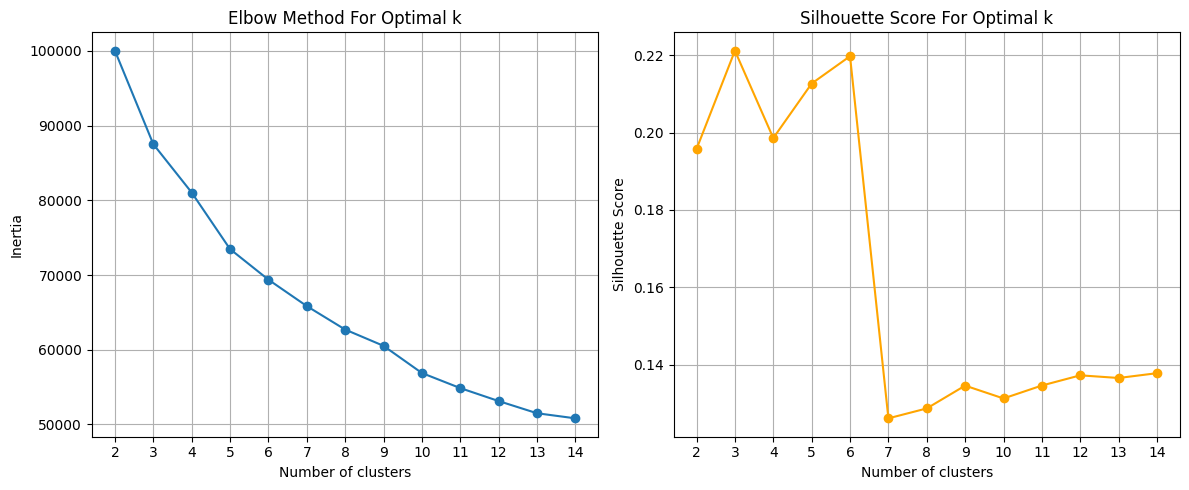

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Step 3: Determine the optimal number of clusters using the Elbow method
inertia = []
silhouette_scores = []
range_n_clusters = range(2, 15)  # Start from 2 clusters to avoid the error

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(principal_components)
    inertia.append(kmeans.inertia_)

    # Calculate silhouette score and append it
    score = silhouette_score(principal_components, kmeans.labels_)
    silhouette_scores.append(score)

# Plotting both Elbow and Silhouette Score in one figure
plt.figure(figsize=(12, 5))

# Subplot for Inertia (Elbow Method)
plt.subplot(1, 2, 1)
plt.plot(range_n_clusters, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(range_n_clusters)
plt.grid()

# Subplot for Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(range_n_clusters, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Score For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range_n_clusters)
plt.grid()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

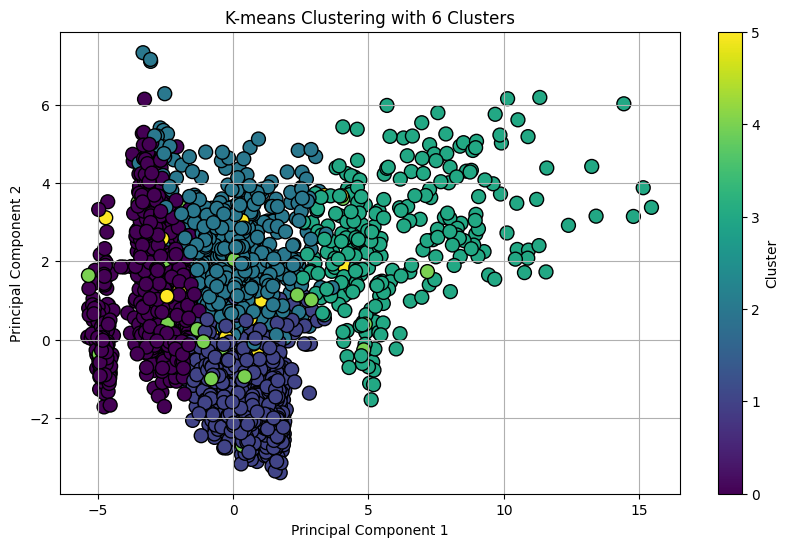

In [ ]:
# Apply K-means clustering with 6 clusters
n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(principal_components)

# Step 4: Get cluster labels
labels = kmeans.labels_

# Step 5: Create a DataFrame to visualize clusters
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(principal_components.shape[1])])
pca_df['Cluster'] = labels

# Step 6: Visualize the clusters (using the first two principal components)
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis', edgecolor='k', s=100)
plt.title('K-means Clustering with 6 Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()

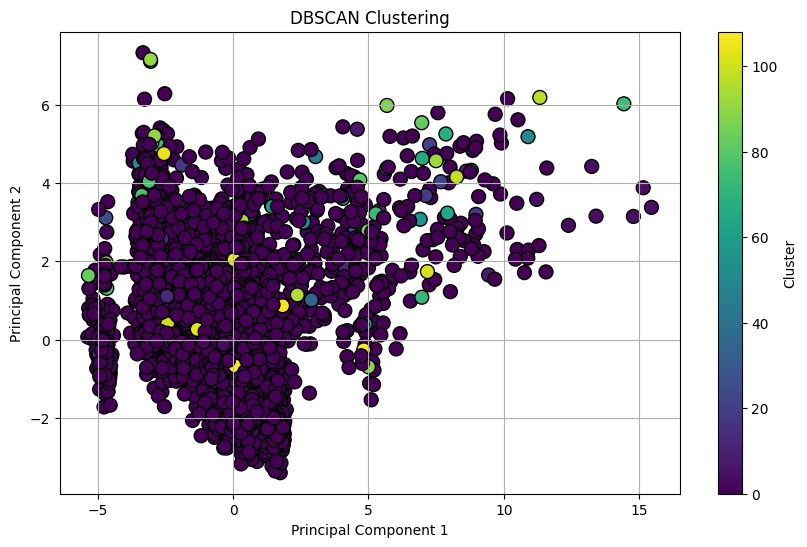

In [ ]:
from sklearn.cluster import DBSCAN
# Step 3: Apply DBSCAN clustering
# You may need to tune eps and min_samples parameters
dbscan = DBSCAN(eps=4, min_samples=1)
dbscan.fit(principal_components)

# Step 4: Get cluster labels
labels = dbscan.labels_

# Step 5: Create a DataFrame to visualize clusters
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(principal_components.shape[1])])
pca_df['Cluster'] = labels

# Step 6: Visualize the clusters
plt.figure(figsize=(10, 6))
# Plot points, using different colors for each cluster and gray for noise (-1)
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis', edgecolor='k', s=100)
plt.title('DBSCAN Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster')
plt.grid()
plt.show()